In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.pyplot import figure
import gmaps

# Google Key
gkey = "#insert your gmaps key here#"
# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Store filepaths in dataframes
AirBNB_df = "data/AirbnbCleaned.csv"
AirBNB_df = pd.read_csv(AirBNB_df)
AirBNB_df.head()

,id,last_scraped,neighbourhood,price,room_type,zipcode,latitude,longitude,month,year,month_scraped
0,8388658,2017-01-01,Sea Cliff,895,Entire home/apt,94121,37.787664,-122.489152,1,2017,2017-01
1,1427660,2017-01-01,Richmond District,150,Entire home/apt,94121,37.775236,-122.509137,1,2017,2017-01
2,15664146,2017-01-01,Richmond District,295,Entire home/apt,94121,37.784365,-122.489515,1,2017,2017-01
3,15285867,2017-01-01,NaN,98,Private room,94121,37.786343,-122.489570,1,2017,2017-01
4,16362304,2017-01-01,Richmond District,85,Private room,94121,37.779841,-122.505483,1,2017,2017-01


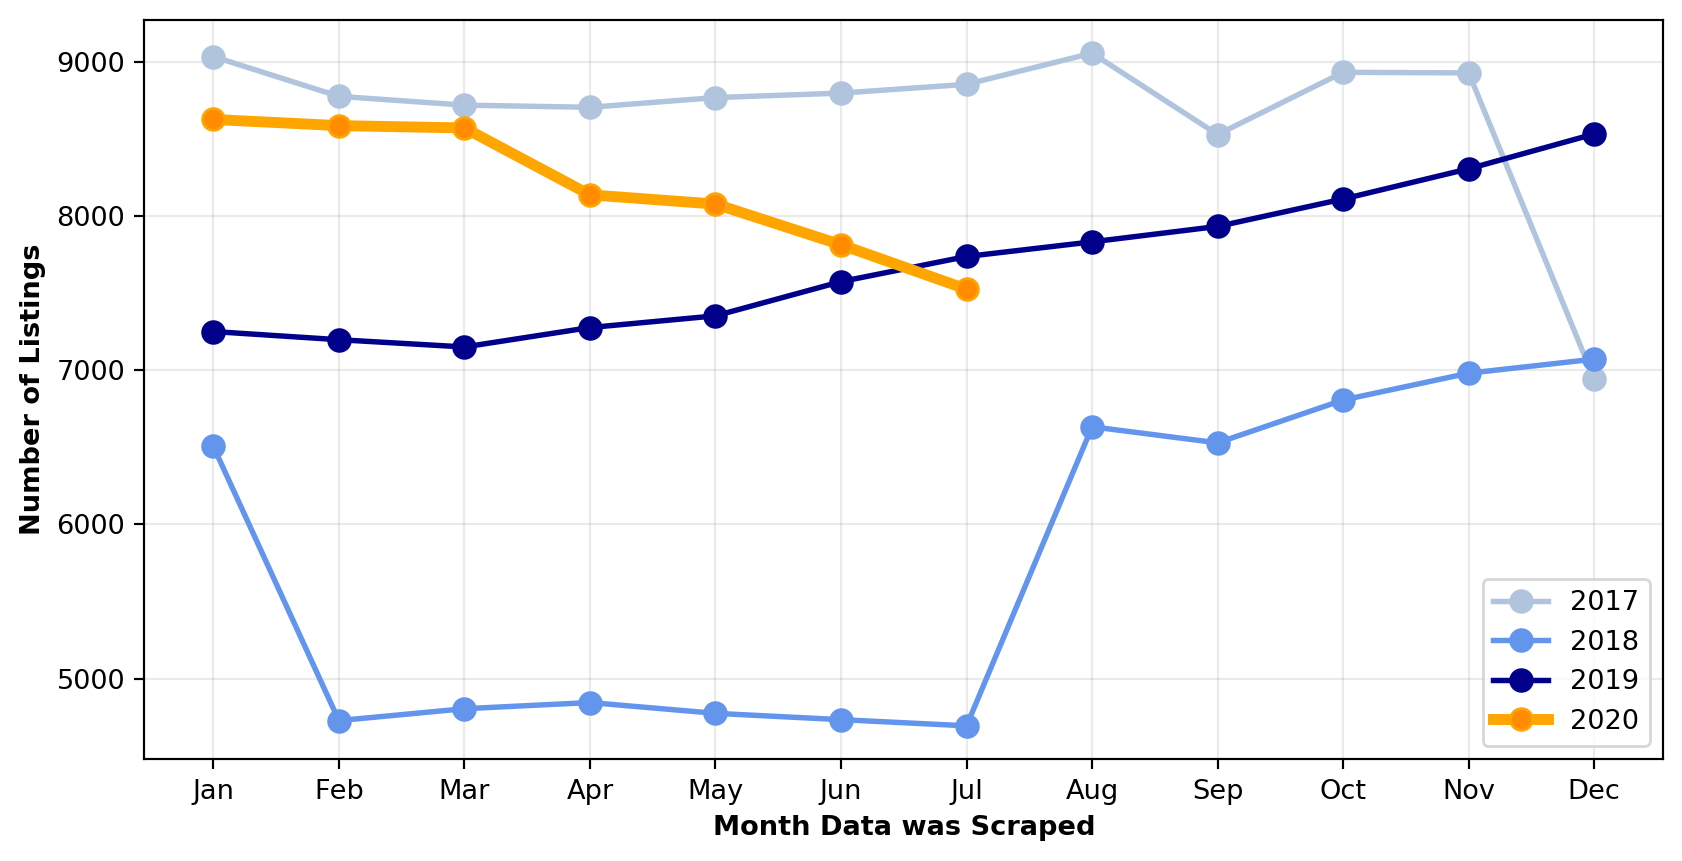

In [3]:
#Create total listings for 2020 dataframe
listings_2020 = AirBNB_df.loc[AirBNB_df['year'] == 2020]
listings_2020_count = listings_2020.groupby('month').count()["id"]
listings_2020_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jun','Jul'], "Listings": listings_2020_count})

#Create total listings for 2019 dataframe
listings_2019 = AirBNB_df.loc[AirBNB_df['year'] == 2019]
listings_2019_count = listings_2019.groupby('month').count()["id"]
listings_2019_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], "Listings": listings_2019_count})

#Create total listings for 2018 dataframe
listings_2018 = AirBNB_df.loc[AirBNB_df['year'] == 2018]
listings_2018_count = listings_2018.groupby('month').count()["id"]
listings_2018_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec'], "Listings": listings_2018_count})
listings_2018_count_df.loc[6] = ['Jun', 4733]  # adding Jun avg for data missing month data from airbnb.com
listings_2018_count_df = listings_2018_count_df.sort_index()  # sorting by index

#Create total listings for 2017 dataframe
listings_2017 = AirBNB_df.loc[AirBNB_df['year'] == 2017]
listings_2017_count = listings_2017.groupby('month').count()["id"]
listings_2017_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], "Listings": listings_2017_count})

#----------------------------------------------------------
#Plot number of listings year over year
#----------------------------------------------------------
total_listings = pd.DataFrame({'x': listings_2019_count_df["Month"], '2020': listings_2020_count_df["Listings"], '2019': listings_2019_count_df["Listings"],'2018': listings_2018_count_df["Listings"],'2017': listings_2017_count_df["Listings"]})
figure(num=None, figsize=(10, 5), dpi=196, facecolor='w', edgecolor='k')
plt.xlabel("Month Data was Scraped",fontsize = 10,weight='bold')
plt.ylabel("Number of Listings",fontsize = 10,weight='bold')
#plt.title("Total Listings in San Francisco",fontsize = 14)
# multiple line plot
plt.plot( 'x', '2017', data=total_listings, marker='o', markerfacecolor='lightsteelblue', markersize=8, color='lightsteelblue', linewidth=2)
plt.plot( 'x', '2018', data=total_listings, marker='o', markerfacecolor='cornflowerblue', markersize=8, color='cornflowerblue', linewidth=2)
plt.plot( 'x', '2019', data=total_listings, marker='o', markerfacecolor='darkblue', markersize=8, color='darkblue', linewidth=2)
plt.plot( 'x', '2020', data=total_listings, marker='o', markerfacecolor='darkorange', markersize=8, color='orange', linewidth=4)
plt.legend()
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.savefig("charts/02_Total_Listings_SF.png", bbox_inches='tight')
plt.show()

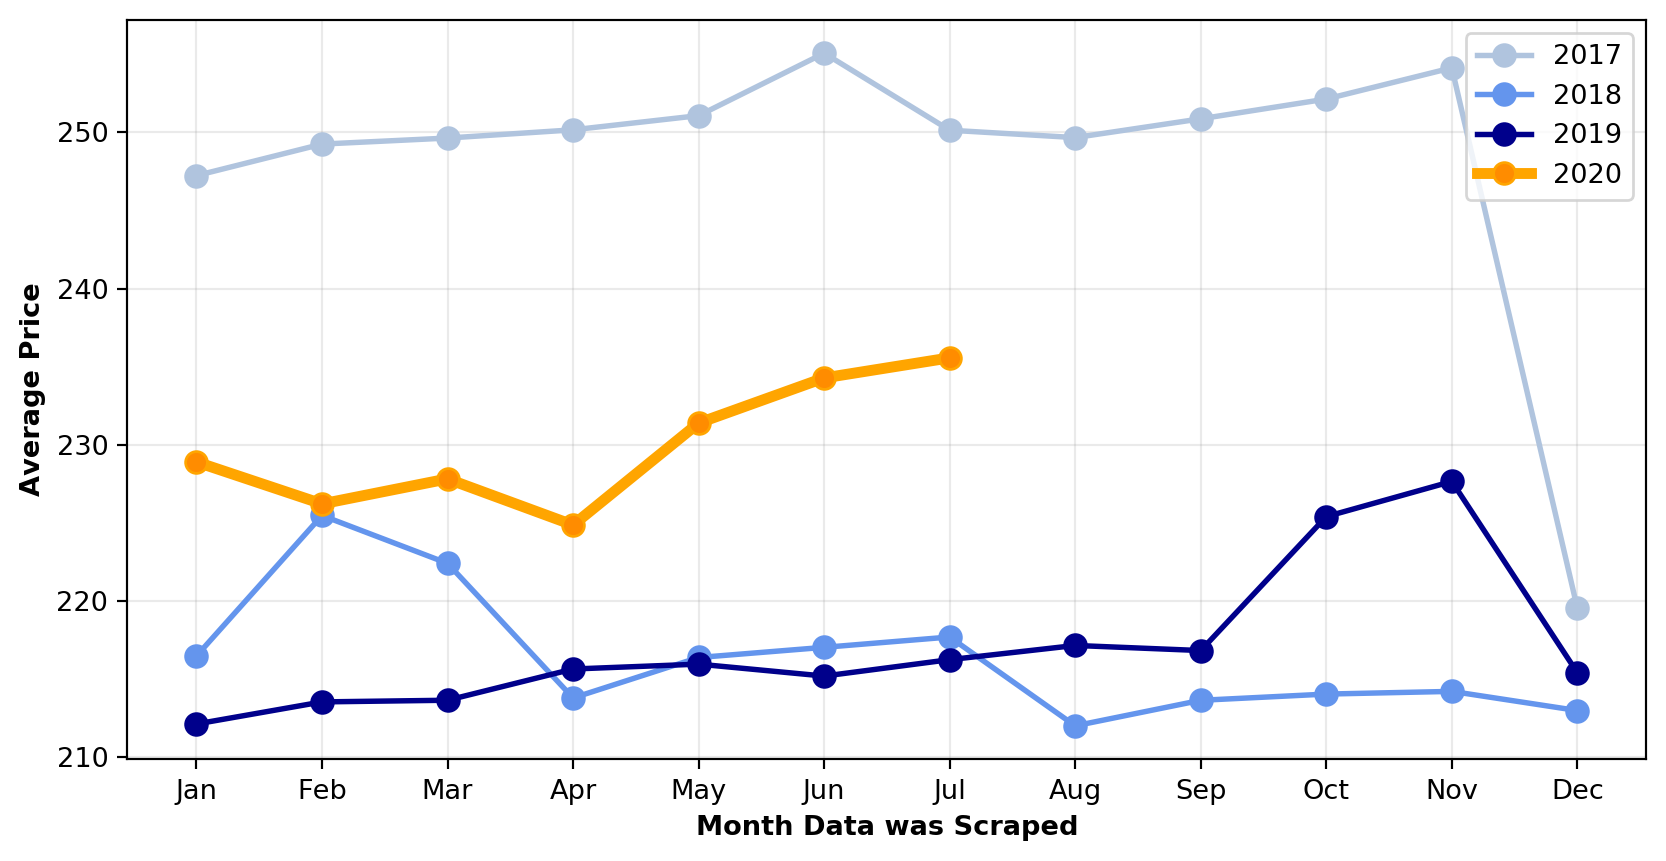

In [4]:
#Create total listings for 2020 dataframe
price_2020 = AirBNB_df.loc[AirBNB_df['year'] == 2020]
price_2020_count = price_2020.groupby('month').mean()["price"]
price_2020_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jun','Jul'], "Price": price_2020_count})

#Create total listings for 2019 dataframe
price_2019 = AirBNB_df.loc[AirBNB_df['year'] == 2019]
price_2019_count = price_2019.groupby('month').mean()["price"]
price_2019_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], "Price": price_2019_count})

#Create total listings for 2018 dataframe
price_2018 = AirBNB_df.loc[AirBNB_df['year'] == 2018]
price_2018_count = price_2018.groupby('month').mean()["price"]
price_2018_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec'], "Price": price_2018_count})
price_2018_count_df.loc[6] = ['Jun', 217.04]  # adding a row for data missing from airbnb.com
price_2018_count_df = price_2018_count_df.sort_index()  # sorting by index

#Create total listings for 2017 dataframe
price_2017 = AirBNB_df.loc[AirBNB_df['year'] == 2017]
price_2017_count = price_2017.groupby('month').mean()["price"]
price_2017_count_df = pd.DataFrame({"Month": ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], "Price": price_2017_count})

#----------------------------------------------------------
#Plot number of listings year over year
#----------------------------------------------------------
average_price = pd.DataFrame({'x': price_2019_count_df["Month"], '2020': price_2020_count_df["Price"], '2019': price_2019_count_df["Price"],'2018': price_2018_count_df["Price"],'2017': price_2017_count_df["Price"]})
figure(num=None, figsize=(10, 5), dpi=196, facecolor='w', edgecolor='k')
plt.xlabel("Month Data was Scraped",fontsize = 10,weight='bold')
plt.ylabel("Average Price",fontsize = 10,weight='bold')
#plt.title("Average Price in San Francisco",fontsize = 14)
# multiple line plot
plt.plot( 'x', '2017', data=average_price, marker='o', markerfacecolor='lightsteelblue', markersize=8, color='lightsteelblue', linewidth=2)
plt.plot( 'x', '2018', data=average_price, marker='o', markerfacecolor='cornflowerblue', markersize=8, color='cornflowerblue', linewidth=2)
plt.plot( 'x', '2019', data=average_price, marker='o', markerfacecolor='darkblue', markersize=8, color='darkblue', linewidth=2)
plt.plot( 'x', '2020', data=average_price, marker='o', markerfacecolor='darkorange', markersize=8, color='orange', linewidth=4)
plt.legend()
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.savefig("charts/02_Average_Price_SF.png", bbox_inches='tight')
plt.show()

In [5]:
#------------------------------------------------------
# Removing Aug-Dec for 2017-2019 for remainder of charts
#------------------------------------------------------
AirBNB_df_Aug = AirBNB_df[AirBNB_df.month != 8]
AirBNB_df_Sep = AirBNB_df_Aug[AirBNB_df_Aug.month != 9]
AirBNB_df_Oct = AirBNB_df_Sep[AirBNB_df_Sep.month != 10]
AirBNB_df_Nov = AirBNB_df_Oct[AirBNB_df_Oct.month != 11]
AirBNB_7mo_df = AirBNB_df_Nov[AirBNB_df_Nov.month != 12]
print(len(AirBNB_7mo_df))

200893


In [6]:
# Create df for 2020 listings
locations_2020 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2020]

# Listings coordinates for map
locations_2020 = locations_2020[["latitude","longitude"]]

# Plot Heatmap
# Set map starting position
sf_coordinates = (37.7749, -122.4194)
figure_layout = {
    'width': '1200px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout=figure_layout, center=sf_coordinates, zoom_level=13)

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations_2020)
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(border='1px solid black', height='900px', padding='1px', width='1200px'))

In [7]:
# Create df for 2019 listings
locations_2019 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2019]

# Listings coordinates for map
locations_2019 = locations_2019[["latitude","longitude"]]

# Plot Heatmap
# Set map starting position
sf_coordinates = (37.7749, -122.4194)
figure_layout = {
    'width': '1200px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout=figure_layout, center=sf_coordinates, zoom_level=13)

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations_2019)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='900px', padding='1px', width='1200px'))

In [8]:
# Create df for 2018 listings
locations_2018 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2018]

# Listings coordinates for map
locations_2018 = locations_2018[["latitude","longitude"]]

# Plot Heatmap
# Set map starting position
sf_coordinates = (37.7749, -122.4194)
figure_layout = {
    'width': '1200px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout=figure_layout, center=sf_coordinates, zoom_level=13)

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations_2018)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='900px', padding='1px', width='1200px'))

In [9]:
# Create df for 2017 listings
locations_2017 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2017]

# Listings coordinates for map
locations_2017 = locations_2017[["latitude","longitude"]]

# Plot Heatmap
# Set map starting position
sf_coordinates = (37.7749, -122.4194)
figure_layout = {
    'width': '1200px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout=figure_layout, center=sf_coordinates, zoom_level=13)

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations_2017)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='900px', padding='1px', width='1200px'))

In [10]:
#Create dataframe for top 10 2020 neighborhoods with avg price

#Grab data set by year 
nb_listings_2020 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2020]
#Group year by neighborhood
nb_listings_2020_count = nb_listings_2020.groupby('neighbourhood').count()["id"]
#Get average price of neighborhood
nb_listings_2020_price = nb_listings_2020.groupby('neighbourhood').mean()["price"]
#Place in new dataframe
nb_price_2020_df = pd.DataFrame({"Listings": nb_listings_2020_count, "Price": nb_listings_2020_price, "Year":2020})
#Limit listing to top 10
nb_price_2020_limited = nb_price_2020_df.nlargest(10, ['Listings']) 
#Sort dataframe by most listings
nb_price_2020_avg_df = nb_price_2020_limited.sort_values(by=['Listings'], ascending=False)
#Reset the index
nb_price_2020_avg_df = nb_price_2020_avg_df.reset_index()

#Create dataframe for top 10 2019 neighborhoods with avg price

#Grab data set by year 
nb_listings_2019 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2019]
#Group year by neighborhood
nb_listings_2019_count = nb_listings_2019.groupby('neighbourhood').count()["id"]
#Get average price of neighborhood
nb_listings_2019_price = nb_listings_2019.groupby('neighbourhood').mean()["price"]
#Place in new dataframe
nb_price_2019_df = pd.DataFrame({"Listings": nb_listings_2019_count, "Price": nb_listings_2019_price, "Year":2019})
#Limit listing to top 10
nb_price_2019_limited = nb_price_2019_df.nlargest(10, ['Listings']) 
#Sort dataframe by most listings
nb_price_2019_avg_df = nb_price_2019_limited.sort_values(by=['Listings'], ascending=False)
#Reset the index
nb_price_2019_avg_df = nb_price_2019_avg_df.reset_index()

#Create dataframe for top 10 2018 neighborhoods with avg price

#Grab data set by year 
nb_listings_2018 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2018]
#Group year by neighborhood
nb_listings_2018_count = nb_listings_2019.groupby('neighbourhood').count()["id"]
#Get average price of neighborhood
nb_listings_2018_price = nb_listings_2019.groupby('neighbourhood').mean()["price"]
#Place in new dataframe
nb_price_2018_df = pd.DataFrame({"Listings": nb_listings_2018_count, "Price": nb_listings_2018_price, "Year":2018})
#Limit listing to top 10
nb_price_2018_limited = nb_price_2018_df.nlargest(10, ['Listings']) 
#Sort dataframe by most listings
nb_price_2018_avg_df = nb_price_2018_limited.sort_values(by=['Listings'], ascending=False)
#Reset the index
nb_price_2018_avg_df = nb_price_2018_avg_df.reset_index()

#Create dataframe for top 10 2017 neighborhoods with avg price

#Grab data set by year 
nb_listings_2017 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2017]
#Group year by neighborhood
nb_listings_2017_count = nb_listings_2017.groupby('neighbourhood').count()["id"]
#Get average price of neighborhood
nb_listings_2017_price = nb_listings_2017.groupby('neighbourhood').mean()["price"]
#Place in new dataframe
nb_price_2017_df = pd.DataFrame({"Listings": nb_listings_2017_count, "Price": nb_listings_2017_price, "Year":2017})
#Limit listing to top 10
nb_price_2017_limited = nb_price_2017_df.nlargest(10, ['Listings']) 
#Sort dataframe by most listings
nb_price_2017_avg_df = nb_price_2017_limited.sort_values(by=['Listings'], ascending=False)
#Reset the index
nb_price_2017_avg_df = nb_price_2017_avg_df.reset_index()

# Place all yearly dataframes above into a single dataframe
nb_price_merge_df = pd.concat([nb_price_2020_avg_df, nb_price_2019_avg_df, nb_price_2018_avg_df, nb_price_2017_avg_df], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
nb_price_merge_df

,neighbourhood,Listings,Price,Year
0,Mission District,5103,208.928082,2020
1,SoMa,4069,338.076432,2020
2,Western Addition/NOPA,3041,238.790858,2020
3,Richmond District,2871,197.534309,2020
4,Downtown,2846,311.757203,2020
5,Nob Hill,2820,254.600000,2020
6,Outer Sunset,2725,157.274128,2020
7,Bernal Heights,2584,187.982972,2020
8,Noe Valley,2362,229.355631,2020
9,The Castro,2287,259.103629,2020


In [11]:
# Group by year and neighborhood
year_nb_combined = nb_price_merge_df.groupby(["neighbourhood","Year"])

# Display Total listing for each month and year by just calling the first command
price_year_nb = year_nb_combined["Price"].first()

# create a data frame so we can graph it in this format
price_year_nb_df = pd.DataFrame({"Average Price":price_year_nb})

# Use unstack to pivot the data by year
price_year_nb_df=price_year_nb_df.unstack(level=1)

price_year_nb_df

Average Price                                    
Year                           2017        2018        2019        2020
neighbourhood                                                          
Bernal Heights           201.584314  185.223470  185.223470  187.982972
Downtown                        NaN  222.942133  222.942133  311.757203
Mission District         223.001017  226.637249  226.637249  208.928082
Nob Hill                 280.715172  197.972527  197.972527  254.600000
Noe Valley               263.444488  226.396962  226.396962  229.355631
Outer Sunset             163.274597  147.751067  147.751067  157.274128
Pacific Heights          335.760989         NaN         NaN         NaN
Richmond District        231.705305  207.399351  207.399351  197.534309
SoMa                     286.624135  222.990116  222.990116  338.076432
The Castro               250.125318  238.490512  238.490512  259.103629
Western Addition/NOPA    280.912343  264.642857  264.642857  238.790858

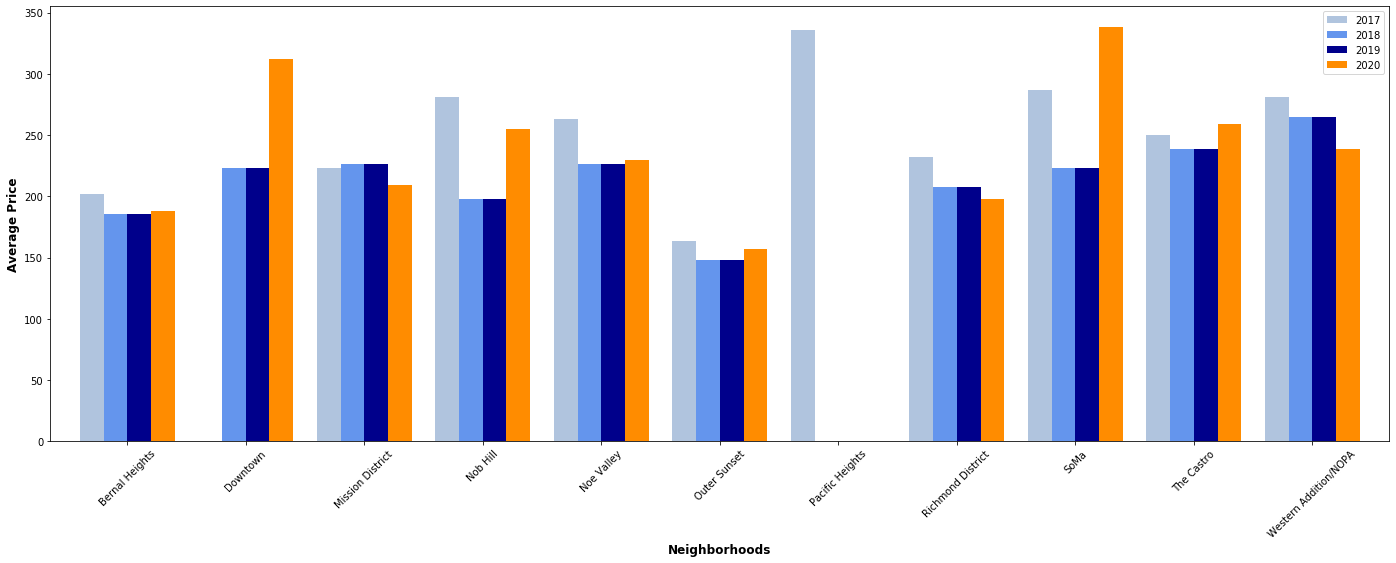

In [12]:
# data so each bar is a month grouped by year
price_year_nb_graph = price_year_nb_df.plot(
    kind = "bar", 
    figsize = (24, 8),
    width = .8, 
    color = ["lightsteelblue","cornflowerblue","darkblue","darkorange"],
    rot = 45
)

plt.xlabel("Neighborhoods",fontsize = 12,weight='bold')
plt.ylabel("Average Price",fontsize = 12,weight='bold')
leg_titles =plt.legend()
leg_titles.get_texts()[0].set_text('2017')
leg_titles.get_texts()[1].set_text('2018')
leg_titles.get_texts()[2].set_text('2019')
leg_titles.get_texts()[3].set_text('2020')

plt.savefig("charts/Avg-Price-NB-All.png", bbox_inches='tight')
plt.show()

In [13]:
#Create data set for neighborhood listings comparision year over year (remove Aug - Dec data)
#AirBNB_df_Aug = AirBNB_df[AirBNB_df.month != 8]
#AirBNB_df_Sep = AirBNB_df_Aug[AirBNB_df_Aug.month != 9]
#AirBNB_df_Oct = AirBNB_df_Sep[AirBNB_df_Sep.month != 10]
#AirBNB_df_Nov = AirBNB_df_Oct[AirBNB_df_Oct.month != 11]
#nb_listings_first7mo = AirBNB_df_Nov[AirBNB_df_Nov.month != 12]
#print(len(nb_listings_first7mo))

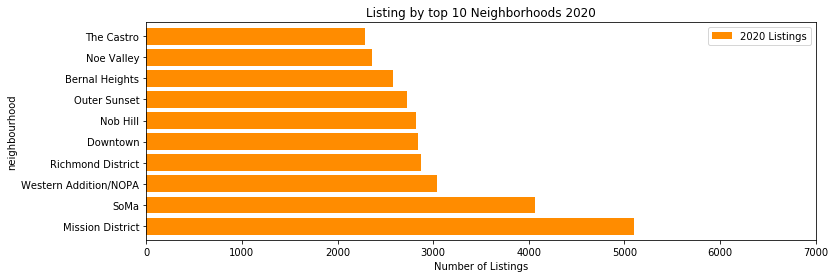

In [14]:
#Grab data set by year 
nb_listings_2020 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2020]
#Group year by neighborhood
nb_listings_2020_count = nb_listings_2020.groupby('neighbourhood').count()["id"]
#Place in new dataframe
nb_listings_2020_df = pd.DataFrame({"2020 Listings": nb_listings_2020_count})
#Limit listing to top 10
nb_listings_2020_df = nb_listings_2020_df.nlargest(10, ['2020 Listings']) 

nb_listings_2020_df.plot(kind = "barh",
                         figsize = (12, 4),
                         width = .8,
                         title = "Listing by top 10 Neighborhoods 2020",
                         color = "darkorange"
                        )
plt.xlabel("Number of Listings")
plt.xlim(0, 7000)
plt.savefig("charts/Top_10_NB_2020.png", bbox_inches='tight')
plt.show()

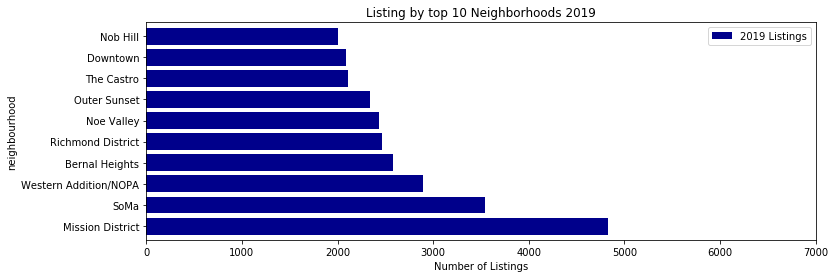

In [15]:
#Grab data set by year 
nb_listings_2019 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2019]

#Group year by neighborhood
nb_listings_2019_count = nb_listings_2019.groupby('neighbourhood').count()["id"]
#Place in new dataframe
nb_listings_2019_df = pd.DataFrame({"2019 Listings": nb_listings_2019_count})
#Limit listing to top 10
nb_listings_2019_df = nb_listings_2019_df.nlargest(10, ['2019 Listings']) 

nb_listings_2019_df.plot(kind = "barh",
                         figsize = (12, 4),
                         width = .8,
                         title = "Listing by top 10 Neighborhoods 2019",
                         color = "darkblue"
                        )
plt.xlabel("Number of Listings")
plt.xlim(0, 7000)
plt.savefig("charts/Top_10_NB_2019.png", bbox_inches='tight')
plt.show()

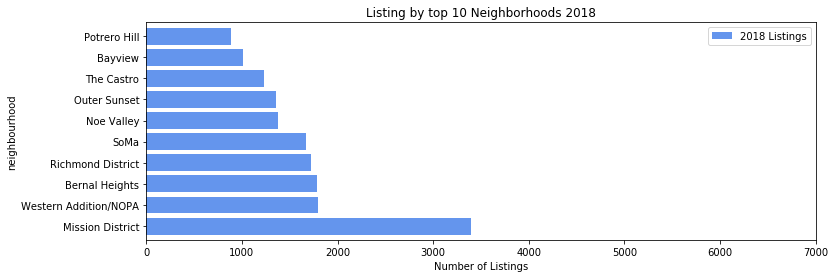

In [16]:
#Grab data set by year 
nb_listings_2018 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2018]
#Group year by neighborhood
nb_listings_2018_count = nb_listings_2018.groupby('neighbourhood').count()["id"]
#Place in new dataframe
nb_listings_2018_df = pd.DataFrame({"2018 Listings": nb_listings_2018_count})
#Limit listing to top 10
nb_listings_2018_df = nb_listings_2018_df.nlargest(10, ['2018 Listings']) 

nb_listings_2018_df.plot(kind = "barh",
                         figsize = (12, 4),
                         width = .8,
                         title = "Listing by top 10 Neighborhoods 2018",
                         color = "cornflowerblue"
                        )
plt.xlabel("Number of Listings")
plt.xlim(0, 7000)
plt.savefig("charts/Top_10_NB_2018.png", bbox_inches='tight')
plt.show()

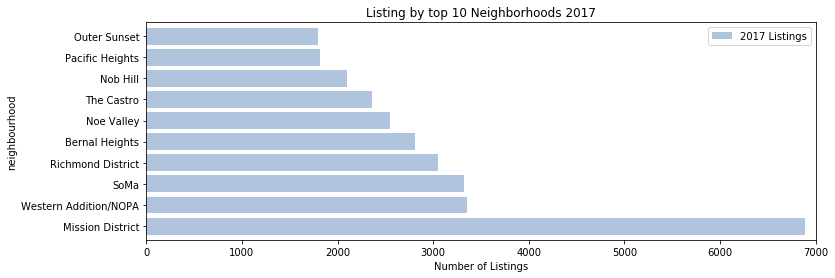

In [17]:
#Grab data set by year 
nb_listings_2017 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2017]
#Group year by neighborhood
nb_listings_2017_count = nb_listings_2017.groupby('neighbourhood').count()["id"]
#Place in new dataframe
nb_listings_2017_df = pd.DataFrame({"2017 Listings": nb_listings_2017_count})
#Limit listing to top 10
nb_listings_2017_df = nb_listings_2017_df.nlargest(10, ['2017 Listings']) 

nb_listings_2017_df.plot(kind = "barh",
                         figsize = (12, 4),
                         width = .8,
                         title = "Listing by top 10 Neighborhoods 2017",
                         color = "lightsteelblue"
                        )
plt.xlabel("Number of Listings")
plt.xlim(0, 7000)
plt.savefig("charts/Top_10_NB_2017.png", bbox_inches='tight')
plt.show()

In [18]:
#Group data set by room type and average price 2020
room_type_2020 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2020]
room_type_2020_count = room_type_2020.groupby('room_type').count()["id"]
room_type_2020_price = room_type_2020.groupby('room_type').mean()["price"]
room_type_2020_df = pd.DataFrame({"Listings": room_type_2020_count, "Price":room_type_2020_price}).reset_index()
room_type_2020_df

,room_type,Listings,Price
0,Entire home/apt,33930,268.001916
1,Hotel room,774,571.418605
2,Private room,20671,167.098205
3,Shared room,1967,93.162684


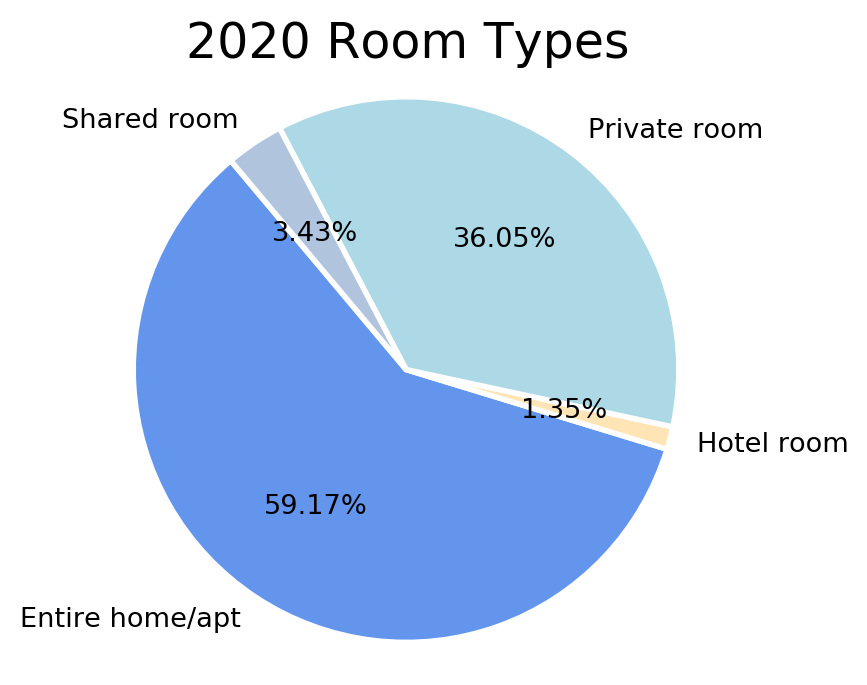

In [19]:
# Define data and attributes for pie chart 2020
room_type_names_2020 = room_type_2020_df["room_type"].tolist() # place rooms in list
room_type_listings_2020 = room_type_2020_df["Listings"].tolist() # place rooms in list
colors = ["cornflowerblue","moccasin","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_listings_2020, labels=room_type_names_2020, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=130, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

plt.title("2020 Room Types",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-2020.png", bbox_inches='tight')
plt.show()

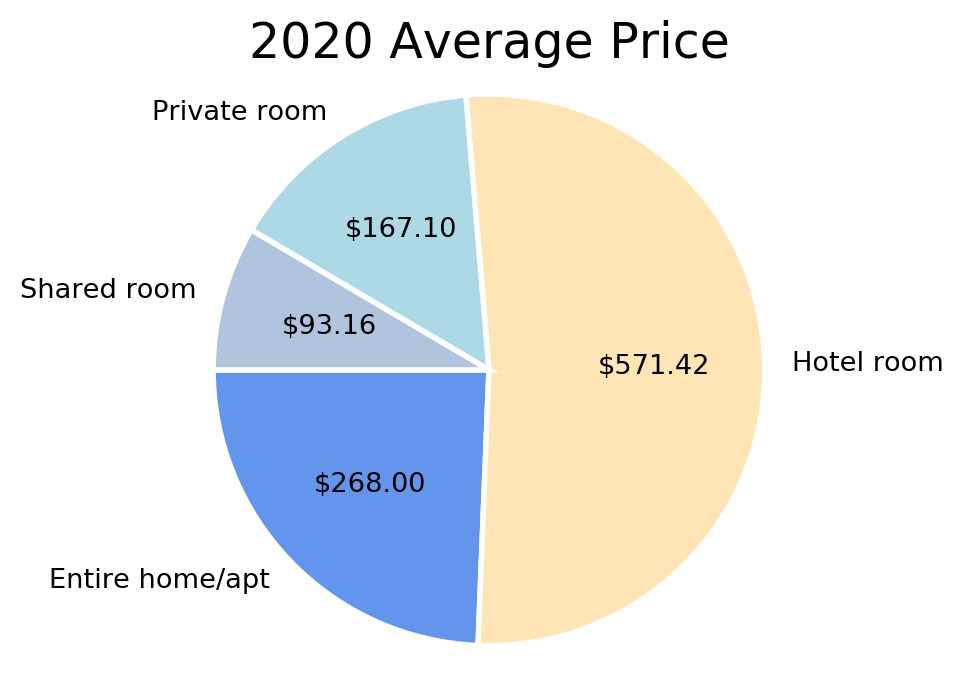

In [20]:
# Define data and attributes for pie chart 2020
room_type_names_2020 = room_type_2020_df["room_type"].tolist() # place rooms in list
room_type_prices_2020 = room_type_2020_df["Price"].tolist() # place rooms in list
colors = ["cornflowerblue","moccasin","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_prices_2020, labels=room_type_names_2020, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=180, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

# for loop to remove percentages from chart and replace with avg price data
for i, a in enumerate(autotexts):
    a.set_text("${:,.2f}".format(room_type_prices_2020[i]))

plt.title("2020 Average Price",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-Price-2020.png", bbox_inches='tight')
plt.show()

In [21]:
#Group data set by room type and average price 2019
room_type_2019 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2019]
room_type_2019_count = room_type_2019.groupby('room_type').count()["id"]
room_type_2019_price = room_type_2019.groupby('room_type').mean()["price"]
room_type_2019_df = pd.DataFrame({"Listings": room_type_2019_count, "Price":room_type_2019_price}).reset_index()
room_type_2019_df

,room_type,Listings,Price
0,Entire home/apt,31520,266.301618
1,Private room,18708,137.159076
2,Shared room,1315,79.193916


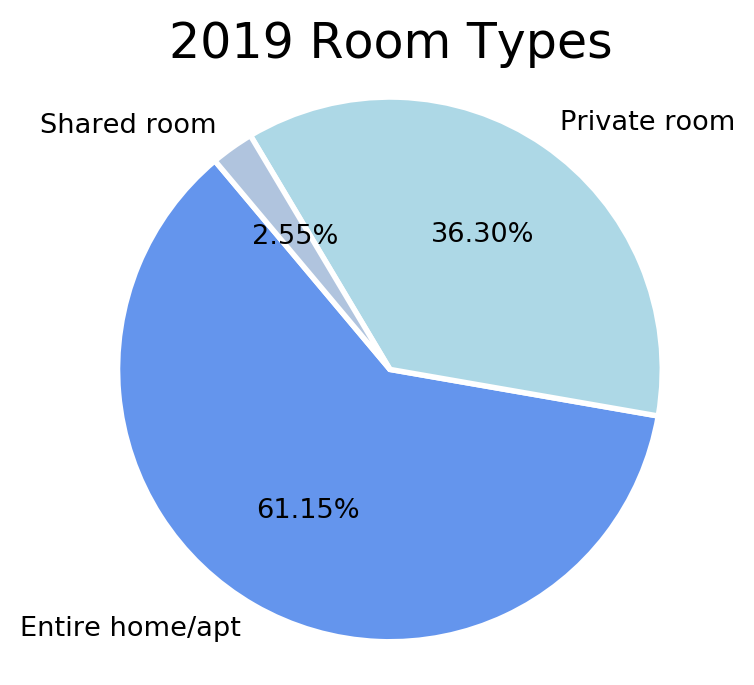

In [22]:
# Define data and attributes for pie chart 2019
room_type_names_2019 = room_type_2019_df["room_type"].tolist() # place rooms in list
room_type_listings_2019 = room_type_2019_df["Listings"].tolist() # place rooms in list
colors = ["cornflowerblue","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_listings_2019, labels=room_type_names_2019, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=130, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

plt.title("2019 Room Types",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-2019.png", bbox_inches='tight')
plt.show()

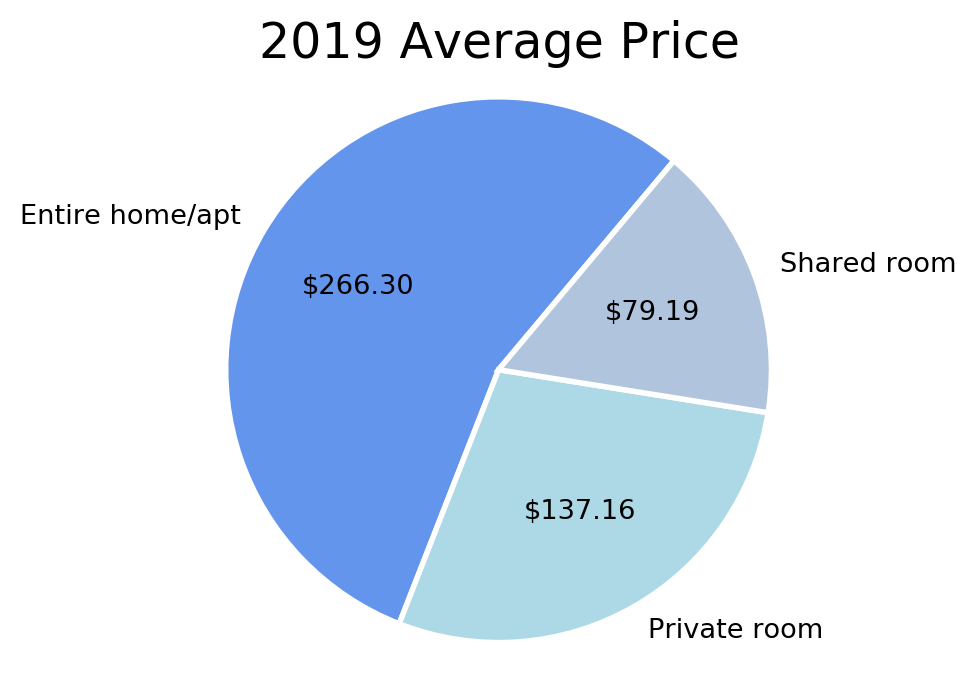

In [23]:
# Define data and attributes for pie chart 2019
room_type_names_2019 = room_type_2019_df["room_type"].tolist() # place rooms in list
room_type_prices_2019 = room_type_2019_df["Price"].tolist() # place rooms in list
colors = ["cornflowerblue","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_prices_2019, labels=room_type_names_2019, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=50, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

# for loop to remove percentages from chart and replace with avg price data
for i, a in enumerate(autotexts):
    a.set_text("${:,.2f}".format(room_type_prices_2019[i]))

plt.title("2019 Average Price",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-Price-2019.png", bbox_inches='tight')
plt.show()

In [24]:
#Group data set by room type and average price 2018
room_type_2018 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2018]
room_type_2018_count = room_type_2018.groupby('room_type').count()["id"]
room_type_2018_price = room_type_2018.groupby('room_type').mean()["price"]
room_type_2018_df = pd.DataFrame({"Listings": room_type_2018_count, "Price":room_type_2018_price}).reset_index()
room_type_2018_df

,room_type,Listings,Price
0,Entire home/apt,17391,284.515842
1,Private room,12336,132.819634
2,Shared room,621,75.167472


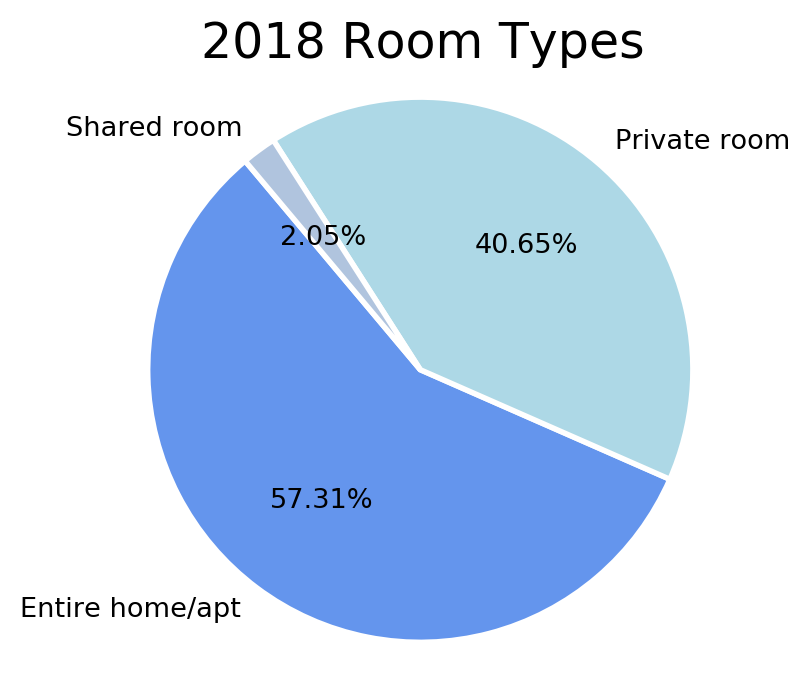

In [25]:
# Define data and attributes for pie chart 2018
room_type_names_2018 = room_type_2018_df["room_type"].tolist() # place rooms in list
room_type_listings_2018 = room_type_2018_df["Listings"].tolist() # place rooms in list
colors = ["cornflowerblue","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_listings_2018, labels=room_type_names_2018, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=130, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

plt.title("2018 Room Types",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-2018.png", bbox_inches='tight')
plt.show()

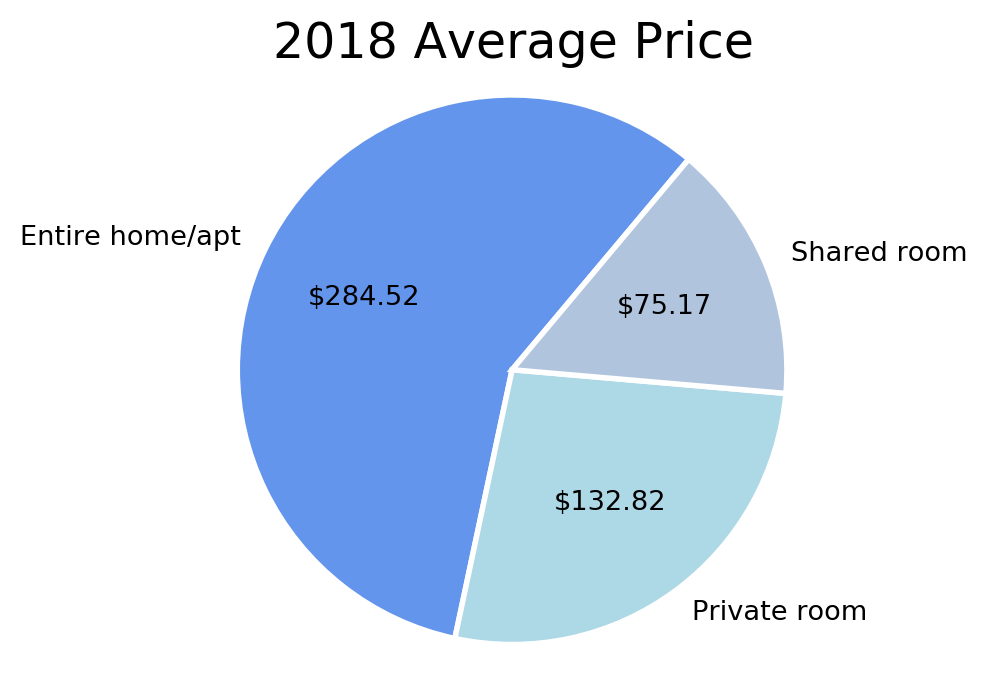

In [26]:
# Define data and attributes for pie chart 2018
room_type_names_2018 = room_type_2018_df["room_type"].tolist() # place rooms in list
room_type_prices_2018 = room_type_2018_df["Price"].tolist() # place rooms in list
colors = ["cornflowerblue","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_prices_2018, labels=room_type_names_2018, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=50, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

# for loop to remove percentages from chart and replace with avg price data
for i, a in enumerate(autotexts):
    a.set_text("${:,.2f}".format(room_type_prices_2018[i]))

plt.title("2018 Average Price",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-Price-2018.png", bbox_inches='tight')
plt.show()

In [27]:
#Group data set by room type and average price 2017
room_type_2017 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2017]
room_type_2017_count = room_type_2017.groupby('room_type').count()["id"]
room_type_2017_price = room_type_2017.groupby('room_type').mean()["price"]
room_type_2017_df = pd.DataFrame({"Listings": room_type_2017_count, "Price":room_type_2017_price}).reset_index()
room_type_2017_df

,room_type,Listings,Price
0,Entire home/apt,36091,325.261450
1,Private room,24221,142.500475
2,Shared room,1348,182.657270


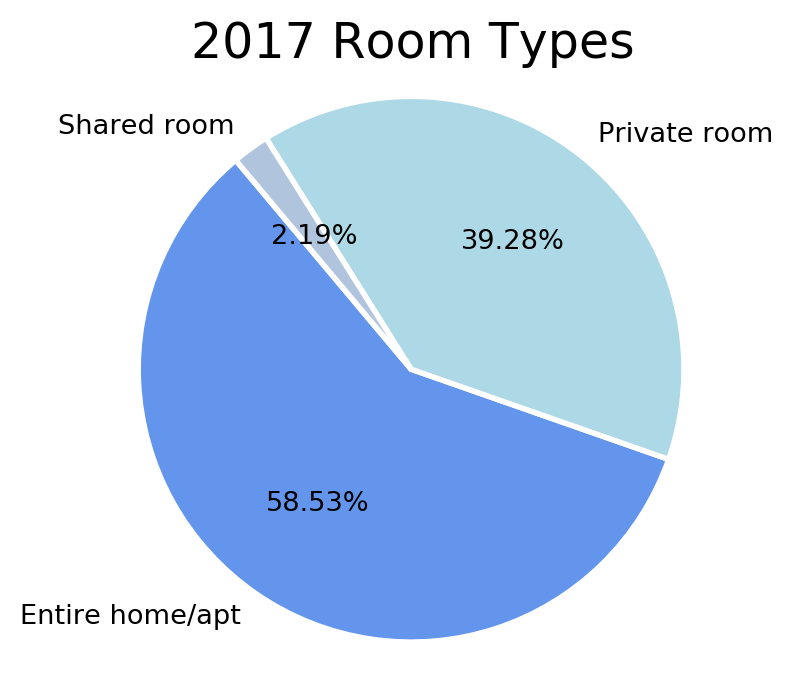

In [28]:
# Define data and attributes for pie chart 2017
room_type_names_2017 = room_type_2017_df["room_type"].tolist() # place rooms in list
room_type_listings_2017 = room_type_2017_df["Listings"].tolist() # place rooms in list
colors = ["cornflowerblue","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_listings_2017, labels=room_type_names_2017, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=130, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

plt.title("2017 Room Types",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-2017.png", bbox_inches='tight')
plt.show()

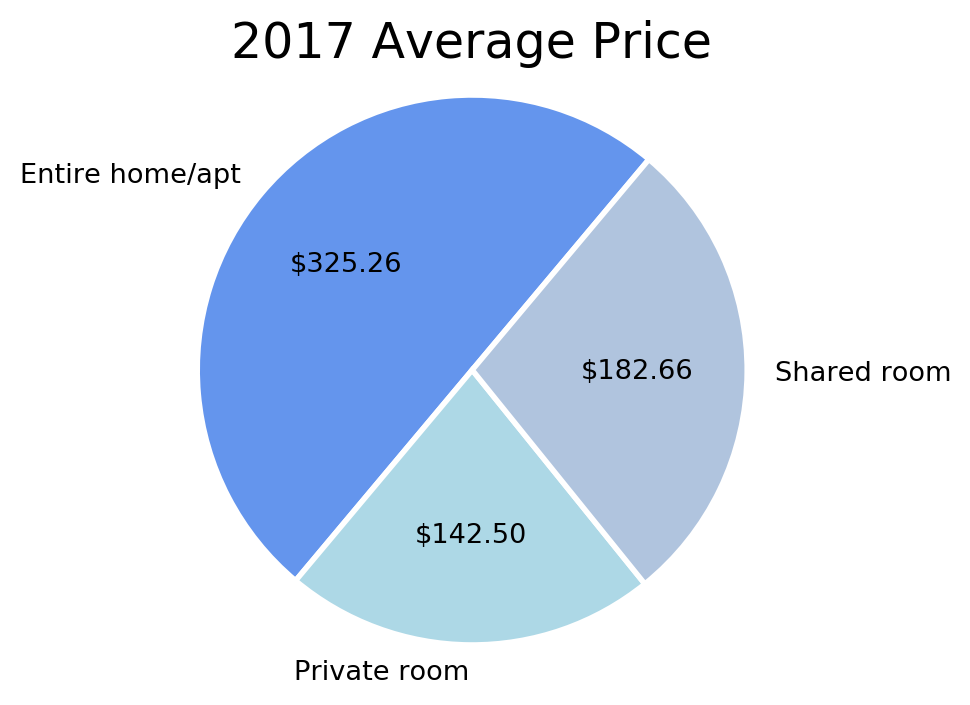

In [29]:
# Define data and attributes for pie chart 2017
room_type_names_2017 = room_type_2017_df["room_type"].tolist() # place rooms in list
room_type_prices_2017 = room_type_2017_df["Price"].tolist() # place rooms in list
colors = ["cornflowerblue","lightblue","lightsteelblue"]

# Tell matplotlib to create a pie chart based upon the above data
figure(figsize=(4, 4), dpi=196)
p, tx, autotexts = plt.pie(room_type_prices_2017, labels=room_type_names_2017, colors=colors,
        autopct="%1.2f%%", shadow=False, startangle=50, wedgeprops={"edgecolor":"#ffffff",'linewidth': 2,
                    'linestyle': 'solid', 'antialiased': True})

# for loop to remove percentages from chart and replace with avg price data
for i, a in enumerate(autotexts):
    a.set_text("${:,.2f}".format(room_type_prices_2017[i]))

plt.title("2017 Average Price",fontsize = 18)
plt.axis('equal')
plt.savefig("charts/Room-Type-Price-2017.png", bbox_inches='tight')
plt.show()

In [30]:
# Grab 2020 data
room_type_mo_price_2020 = AirBNB_7mo_df.loc[AirBNB_7mo_df['year'] == 2020]

# Group by year and neighborhood
room_type_mo_price_2020_combined = room_type_mo_price_2020.groupby(["room_type","month_scraped"])

# Display Total listing for each month and year by just calling the first command
price_room_type_mo = room_type_mo_price_2020_combined["price"].mean()

# create a data frame so we can graph it in this format
price_room_type_mo_df = pd.DataFrame({"Average Price":price_room_type_mo})

# Use unstack to pivot the data by year
price_room_type_mo_df = price_room_type_mo_df.unstack(level=1)

price_room_type_mo_df


Average Price                                                  \
month_scraped         2020-01     2020-02     2020-03     2020-04     2020-05   
room_type                                                                       
Entire home/apt    274.829167  271.864263  272.682725  265.726956  261.281446   
Hotel room         232.458065  269.792793  281.060000  280.011494  978.063063   
Private room       167.475873  163.282440  166.891726  166.255334  167.446676   
Shared room         92.301418   88.672185   87.137380   95.832700   90.638225   

                                           
month_scraped        2020-06      2020-07  
room_type                                  
Entire home/apt   264.233651   264.181492  
Hotel room       1025.552381  1024.619048  
Private room      169.086756   169.716341  
Shared room        94.629213   105.838057

In [31]:
# Convert each "room_type" row's price values to a list
price_room_type_mo_df_list = price_room_type_mo_df.values.tolist()
price_room_type_mo_df_list

[[274.82916666666665,
  271.8642631993696,
  272.6827245804541,
  265.72695616550595,
  261.2814458838278,
  264.23365093113904,
  264.1814922697737],
 [232.45806451612904,
  269.7927927927928,
  281.06,
  280.01149425287355,
  978.063063063063,
  1025.5523809523809,
  1024.6190476190477],
 [167.47587301587302,
  163.28244028405422,
  166.8917259211377,
  166.25533379215418,
  167.446675900277,
  169.08675637393767,
  169.71634083364071],
 [92.30141843971631,
  88.67218543046357,
  87.1373801916933,
  95.83269961977186,
  90.6382252559727,
  94.62921348314607,
  105.83805668016194]]

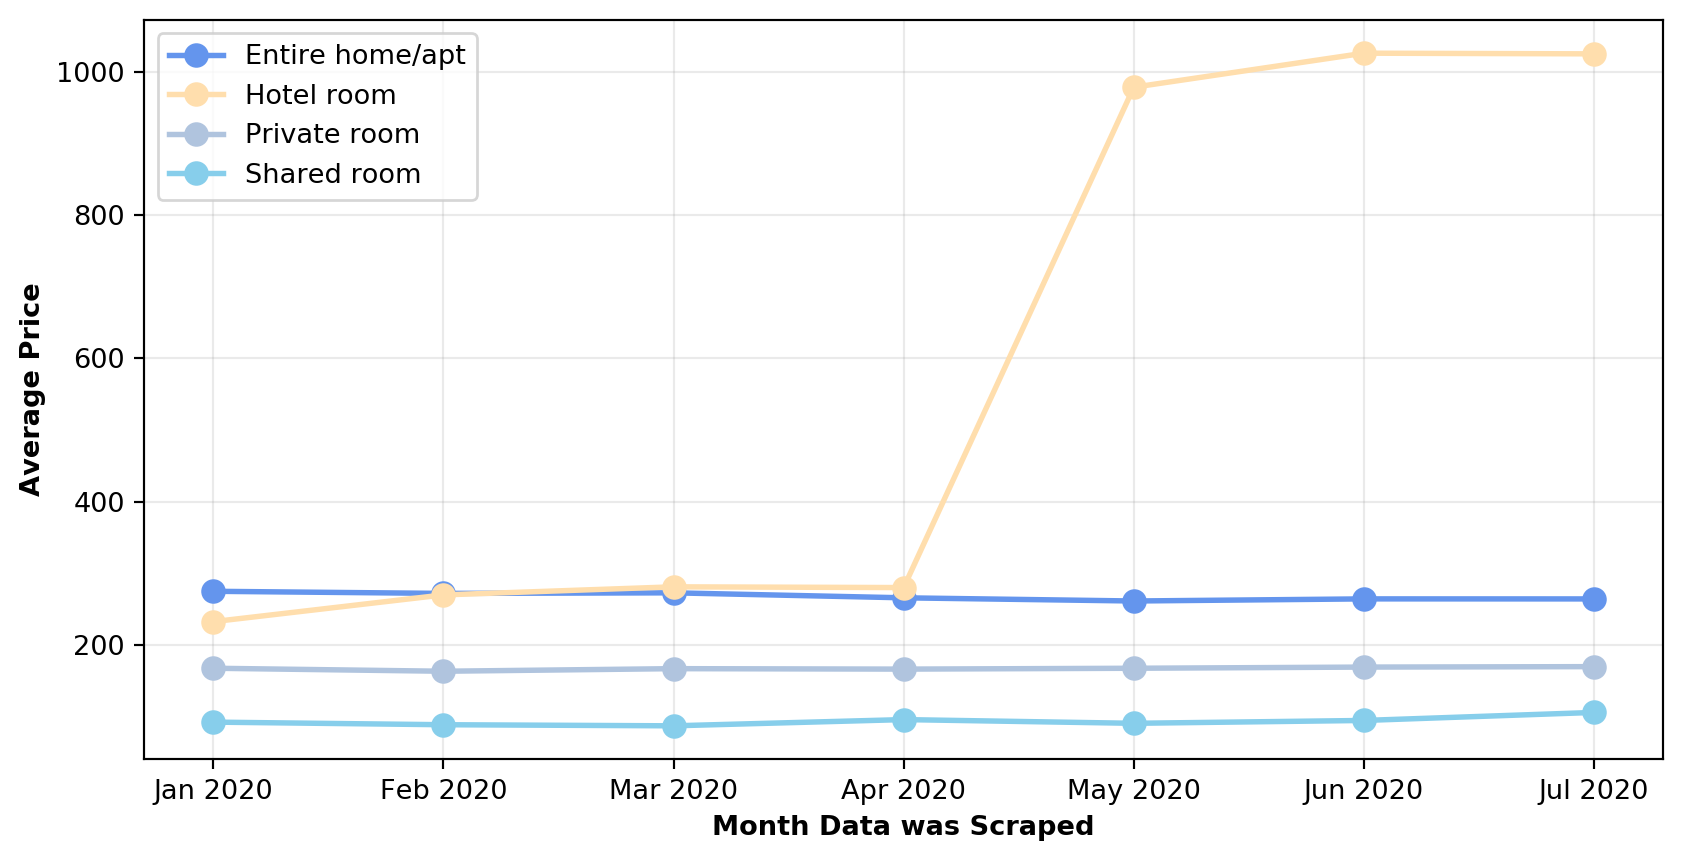

In [32]:
#----------------------------------------------------------
#Plot x-axis as months, y-axis as avg prices and plot lines as room types
#----------------------------------------------------------

# Build room type names list and months list
room_type_names_2020 = room_type_2020_df["room_type"].tolist() # place rooms in list
room_month_names_2020 = ["Jan 2020","Feb 2020","Mar 2020","Apr 2020","May 2020","Jun 2020","Jul 2020"]

# Make dataframe for chart
total_room_prices_2020 = pd.DataFrame({'x': room_month_names_2020, 
                                       'Entire home/apt': price_room_type_mo_df_list[0],
                                       'Hotel room': price_room_type_mo_df_list[1],
                                       'Private room': price_room_type_mo_df_list[2],
                                       'Shared room': price_room_type_mo_df_list[3]
                                      })
figure(num=None, figsize=(10, 5), dpi=196, facecolor='w', edgecolor='k')
plt.xlabel("Month Data was Scraped",fontsize = 10,weight='bold')
plt.ylabel("Average Price",fontsize = 10,weight='bold')
#plt.title("Total Listings in San Francisco",fontsize = 14)
# multiple line plot
plt.plot( 'x', 'Entire home/apt', data=total_room_prices_2020, marker='o', markerfacecolor='cornflowerblue', markersize=8, color='cornflowerblue', linewidth=2)
plt.plot( 'x', 'Hotel room', data=total_room_prices_2020, marker='o', markerfacecolor='navajowhite', markersize=8, color='navajowhite', linewidth=2)
plt.plot( 'x', 'Private room', data=total_room_prices_2020, marker='o', markerfacecolor='lightsteelblue', markersize=8, color='lightsteelblue', linewidth=2)
plt.plot( 'x', 'Shared room', data=total_room_prices_2020, marker='o', markerfacecolor='skyblue', markersize=8, color='skyblue', linewidth=2)
plt.legend()
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.2)
plt.savefig("charts/Total_Room_Prices_2020.png", bbox_inches='tight')
plt.show()

